In [1]:
import numpy as np 
import pandas as pd 
import os 

- os stands for operating system functionalities 
- os can helps to get the current working directory or change the directory 

In [2]:
train_df = pd.read_csv("C:/Users/Navin Kumar/Desktop/coding_jupyter_notebook/DATA/train_dt.csv")

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
os.getcwd()

'C:\\Users\\Navin Kumar\\Desktop\\coding_jupyter_notebook\\Lectures'

In [5]:
train_df.sample(5).T

,188,45,334,267,196
Loan_ID,LP001644,LP001137,LP002103,LP001882,LP001666
Gender,NaN,Female,NaN,Male,Male
Married,Yes,No,Yes,Yes,No
Dependents,0,0,1,3+,0
Education,Graduate,Graduate,Graduate,Graduate,Graduate
Self_Employed,Yes,No,Yes,No,No
ApplicantIncome,674,3410,9833,4333,8333
CoapplicantIncome,5296.0,0.0,1833.0,1811.0,3750.0
LoanAmount,168.0,88.0,182.0,160.0,187.0
Loan_Amount_Term,360.0,NaN,180.0,360.0,360.0


# Exploratory data analysis

#### `getting information about the data`

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### `GETTING TOTAL NUMBER OF MISSING DATA`

In [7]:
 train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### `MISSING DATA IN PERCENTAGE` 

In [8]:
train_df.isna().sum()/len(train_df) * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

#### `generally for <=1 % missing data ,we drop it `

#### `DROP THE MISSING DATA `

In [9]:
train_df.dropna(inplace=True)  # inplace = true is we are saving this operation for original dataset for further operations

In [10]:
train_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


#### `CHECK FOR DUPLICATE DATA`

In [12]:
train_df.duplicated().sum()

0

#### `LET US UNDERSTAND RELATIONSHIP BETWEEN INPUT VARIABLES AND TARGET VARIABLES`

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt 

###### `1. RELATIONSHIP BETWEEN GENDER AND LOAN APPROVAL`

<Axes: xlabel='Gender', ylabel='count'>

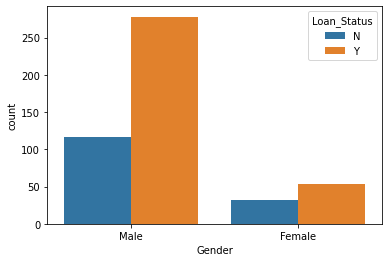

In [14]:
sns.countplot(x=train_df['Gender'], hue = train_df['Loan_Status'])

In [15]:
df_sum = train_df.groupby(['Gender','Loan_Status']).agg(Loan_approved_count= ('Loan_Status','count')).reset_index()

In [16]:
df_sum

,Gender,Loan_Status,Loan_approved_count
0,Female,N,32
1,Female,Y,54
2,Male,N,116
3,Male,Y,278


In [17]:
df_sum_applicants = train_df.groupby(['Gender']).agg(Total_gender_Loan_approved_count= ('Loan_Status','count')).reset_index()
df_sum_applicants

,Gender,Total_gender_Loan_approved_count
0,Female,86
1,Male,394


In [18]:
df_sum_applicants_merged= df_sum.merge(df_sum_applicants,how = 'left',on = 'Gender')

In [19]:
df_sum_applicants_merged

,Gender,Loan_Status,Loan_approved_count,Total_gender_Loan_approved_count
0,Female,N,32,86
1,Female,Y,54,86
2,Male,N,116,394
3,Male,Y,278,394


In [20]:
df_sum_applicants_merged['percentage']= (df_sum_applicants_merged['Loan_approved_count']/df_sum_applicants_merged['Total_gender_Loan_approved_count'])* 100

In [21]:
df_sum_applicants_merged

,Gender,Loan_Status,Loan_approved_count,Total_gender_Loan_approved_count,percentage
0,Female,N,32,86,37.209302
1,Female,Y,54,86,62.790698
2,Male,N,116,394,29.441624
3,Male,Y,278,394,70.558376


- `OBSERVATION: LOAN APPROVAL REJECTION IS HIGHER FOR FEAMLE CANDITATES `

#### `2.REALATIONSHIP BETWEEN INCOME AND LOAN APPROVAL`

<Axes: xlabel='ApplicantIncome', ylabel='count'>

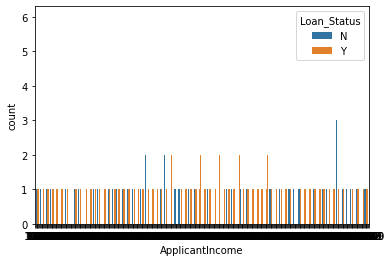

In [22]:
sns.countplot(x=train_df['ApplicantIncome'],hue = train_df['Loan_Status'])

In [23]:
#by intution we can say we can't use countplot here right 

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

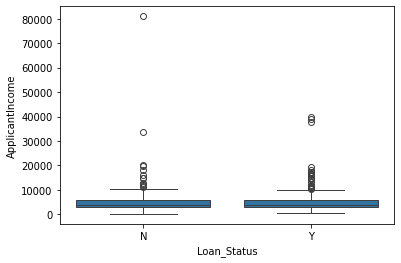

In [24]:
sns.boxplot(x=train_df['Loan_Status'], y =train_df['ApplicantIncome'])

In [25]:
#there are a lot of outliers , for knowing the outliers we do ->

In [26]:
train_df["ApplicantIncome"].describe() 

count      480.000000
mean      5364.231250
std       5668.251251
min        150.000000
25%       2898.750000
50%       3859.000000
75%       5852.500000
max      81000.000000
Name: ApplicantIncome, dtype: float64

For the given data:

- 25% (Q1): 2898.75
This means that 25% of the ApplicantIncome values are less than or equal to 2898.75. Conversely, 75% of the values are greater than 2898.75.

- we know that if ratio b/w standard deviation and mean is less than 0.5 then the given data is highly scattered 

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

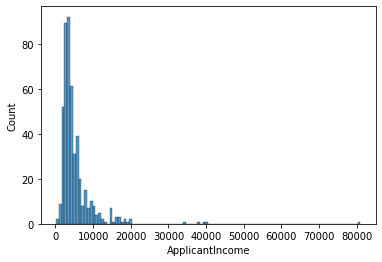

In [27]:
sns.histplot(x=train_df['ApplicantIncome'])

In [28]:
#we can see it is a skewed plot for making it normal plot we have to remove income >12000 income 

In [29]:
filter_income = train_df['ApplicantIncome']<=12000

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

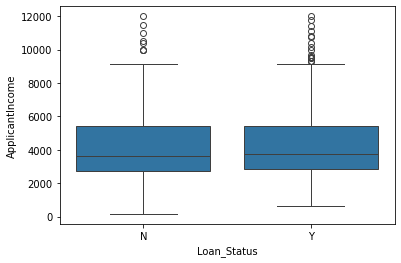

In [30]:
sns.boxplot(x=train_df[filter_income]["Loan_Status"],y=train_df[filter_income]['ApplicantIncome'])

#### `observation:` Looking at the boxplot after removing outliers , it seems that applicant income has not much impact on loan approval status

##### `3. Relationship between b/w loan ammount and Loan Status `

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

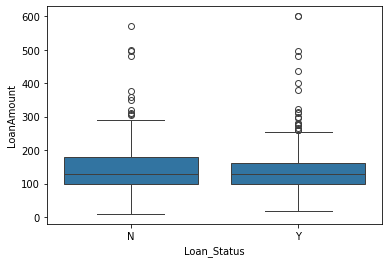

In [31]:
sns.boxplot(x=train_df['Loan_Status'], y =train_df['LoanAmount'])

In [32]:
sns.heatmap(train_df[["Loan_Status",'LoanAmount']].corr(),annot=True)

ValueError: could not convert string to float: 'N'

In [ ]:
from  sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_df['Loan_Status']=le.fit_transform(train_df['Loan_Status'])
train_df['Loan_Status']

In [33]:
sns.heatmap(train_df[["Loan_Status",'LoanAmount']].corr(),annot=True)

ValueError: could not convert string to float: 'N'

<Axes: xlabel='LoanAmount', ylabel='Count'>

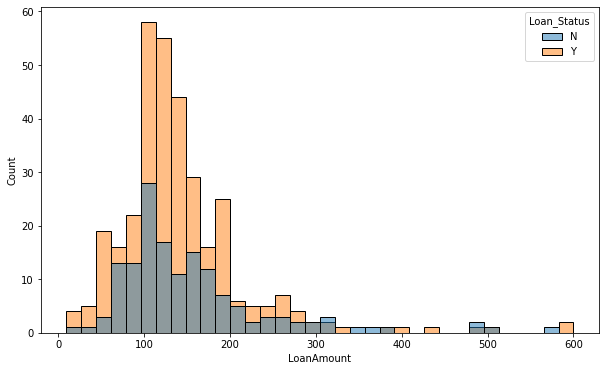

In [34]:
plt.figure(figsize = (10,6))
sns.histplot(data =train_df , x = "LoanAmount",hue = "Loan_Status")

In [35]:
train_df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


- `Oervation: It is a mixed observation , if Loan amount has  a effect on loan status`

####  4. Relationship between Property type and loan status

<Axes: xlabel='Property_Area', ylabel='count'>

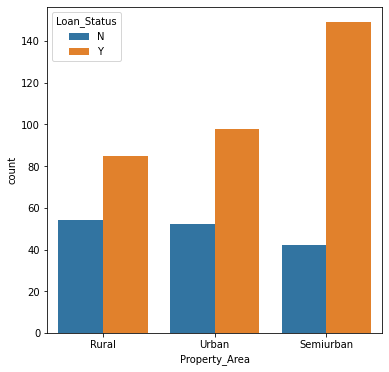

In [36]:
plt.subplots(figsize = (6,6))
sns.countplot(x=train_df['Property_Area'],hue = train_df["Loan_Status"])

- `Observation:` 
- Rural property are getting least number of loan approval     
- Semiurban property are getting highest number of loan approval 

5. Relationship between applicants job type and loan approval relationship 

<Axes: xlabel='Self_Employed', ylabel='count'>

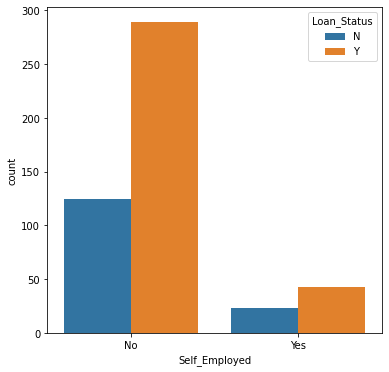

In [37]:
plt.subplots(figsize = (6,6))
sns.countplot(x=train_df['Self_Employed'], hue= train_df['Loan_Status'])

- Observation : number of loan applicants and approval are highest for salary folks 

#### `Correlation Matrix`

In [38]:
train_df.corr()

ValueError: could not convert string to float: 'LP001003'

In [39]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Loan_ID']= le.fit_transform(train_df['Loan_ID'])
train_df['Loan_ID']

1        0
2        1
3        2
4        3
5        4
      ... 
609    475
610    476
611    477
612    478
613    479
Name: Loan_ID, Length: 480, dtype: int32

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['Gender']= le.fit_transform(train_df['Gender'])
train_df['Married']= le.fit_transform(train_df['Education'])
train_df['Dependents']= le.fit_transform(train_df['Dependents'])
train_df['Education']= le.fit_transform(train_df['Gender'])
train_df['Self_Employed']= le.fit_transform(train_df['Self_Employed'])
train_df['Property_Area']= le.fit_transform(train_df['Property_Area'])



In [72]:
train_df.corr()

ValueError: could not convert string to float: 'N'

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df.corr(),annot=True,cmap = "Blues")

ValueError: could not convert string to float: 'N'

<Figure size 864x576 with 0 Axes>

- Input variables seem to be not correlated much which is signs of multicollinearity
- Correlation value between `-0.3` to `0.3` --> weak corelation 
- Correlation value between `0.3` to `0.7` --> Moderate corelation 
- Corelation value between `0.7` to `1` --> highly coreleted
- Correlation value between `-0.3` to `-0.7` --> -ve Moderate corelation 
- Correlation value between `-0.7` to `-1` --> -ve high corelation(means if one is increases then another one decreases ) 

`Observation` : `Applicant income` seems to be `moderately` correleted with `loan amount` <br>
                `Married` and `gender` seems to be highly coreleted.

In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    int32  
 1   Gender             480 non-null    int32  
 2   Married            480 non-null    int32  
 3   Dependents         480 non-null    int32  
 4   Education          480 non-null    int64  
 5   Self_Employed      480 non-null    int32  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int32  
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int32(6), int64(2), object(1)
memory usage: 41.2+ KB


 EDA done 

## Encoding categorical Feature

In [45]:
train_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

selecting important input variable only


In [46]:
select_columns = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

`pd.get dummmies`

In [47]:
train_df_encoded = pd.get_dummies(train_df[select_columns],drop_first = True)

In [48]:
train_df_encoded

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,0,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,0,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,0,3,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,0,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,0,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [49]:
del train_df_encoded

In [50]:
train_df_encoded = pd.get_dummies(train_df[select_columns])
train_df_encoded

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,0,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,0,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,0,3,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,0,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,0,2,1,0,7583,0.0,187.0,360.0,1.0,2


- `pd.get_dummies()` : This is a pandas function used to perform **one-hot** encoding . It converts categorical variables into dummy variables .
- `drop_first=True` ==> it drops the first columns of each categorical variable after encoding, and This is done to prevent `multicolinearity.` 

## Multicolinearity 

**`Multicollinearity`** refers to a situation in statistical modeling, particularly in multiple regression analysis, where two or more predictor variables are highly correlated. This means that one predictor variable can be linearly predicted from the others with a substantial degree of accuracy.

Here are some key points about multicollinearity:

**detection:**

- High correlation coefficients (close to 1 or -1) between pairs of predictor variables.
- Variance Inflation Factor (VIF) values greater than 10 (or sometimes even greater than 5) indicate    high multicollinearity.
- Eigenvalues close to zero in the correlation matrix can also be a sign.

**Problems Caused by Multicollinearity:**

- It makes the coefficient estimates of the regression model unstable and highly sensitive to changes in the model.
- It can inflate the standard errors of the coefficients, making it harder to determine the individual effect of each predictor variable.
- It can reduce the statistical power of the regression model, leading to less reliable hypothesis tests.

**Solutions:**

- Remove one of the highly correlated predictor variables.
- Combine the correlated variables into a single predictor through techniques like Principal Component Analysis (PCA).
- Use regularization methods such as Ridge Regression or Lasso Regression, which can handle multicollinearity by adding a penalty to the size of coefficients.

In [51]:
del train_df_encoded

In [52]:
train_df_encoded_final = pd.get_dummies(train_df[select_columns],drop_first= True)
train_df_encoded_final

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,0,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,0,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,0,3,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,0,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,0,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [53]:
print(train_df[select_columns].dtypes)


Gender                 int32
Married                int32
Dependents             int32
Education              int64
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
dtype: object


In [54]:
train_df_encoded_final = train_df_encoded_final.astype(int)
print(train_df_encoded_final.dtypes)

Gender               int32
Married              int32
Dependents           int32
Education            int32
Self_Employed        int32
ApplicantIncome      int32
CoapplicantIncome    int32
LoanAmount           int32
Loan_Amount_Term     int32
Credit_History       int32
Property_Area        int32
dtype: object


In [55]:
train_df_encoded_final

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,0,1,1,0,4583,1508,128,360,1,0
2,1,0,0,1,1,3000,0,66,360,1,2
3,1,1,0,1,0,2583,2358,120,360,1,2
4,1,0,0,1,0,6000,0,141,360,1,2
5,1,0,2,1,1,5417,4196,267,360,1,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0,71,360,1,0
610,1,0,3,1,0,4106,0,40,180,1,0
611,1,0,1,1,0,8072,240,253,360,1,2
612,1,0,2,1,0,7583,0,187,360,1,2


## Train Test split 

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #standarizing the data z = (X- mean )/sigma
from sklearn.tree import DecisionTreeClassifier 

In [57]:
X= train_df_encoded_final
y=train_df['Loan_Status']
y


1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: object

In [58]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

`random_state` is called seeding which give a key to the set of random sampled values so that even the notebook restart , sample for train test split doesn't change 

In [59]:
X_train.shape 

(384, 11)

In [60]:
X_test.shape

(96, 11)

## Build the DT model

In [61]:
tree_model_1 = DecisionTreeClassifier() #model with default settings 

#### Train the decision tree model on Loan Approval data 

In [62]:
tree_model_1.fit(X_train,y_train)

DecisionTreeClassifier()

#### Predict the validation(test) data

In [63]:
pred_values = tree_model_1.predict(X_test)

#### Performance metrics

In [64]:
from sklearn.metrics import accuracy_score , precision_score, recall_score , confusion_matrix

In [65]:
print('validation Score :', accuracy_score(pred_values, y_test)*100)

validation Score : 75.0


In [66]:
#plot the confusion matrix 

In [67]:
cm = confusion_matrix(pred_values, y_test)
cm

array([[15, 11],
       [13, 57]], dtype=int64)

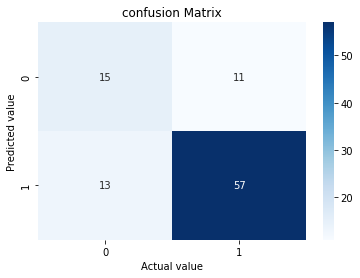

In [68]:
sns.heatmap(cm,annot=True,cmap = 'Blues')
plt.title("confusion Matrix")
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.show()

In [69]:
100-24/(57+15+11+13)*100

75.0

In [70]:
from sklearn.metrics import classification_report
clf_report = classification_report(pred_values,y_test)
print(clf_report)

              precision    recall  f1-score   support

           N       0.54      0.58      0.56        26
           Y       0.84      0.81      0.83        70

    accuracy                           0.75        96
   macro avg       0.69      0.70      0.69        96
weighted avg       0.76      0.75      0.75        96



##  Hyper parameter Tuning Methds 

In [102]:
from sklearn.model_selection import GridSearchCV

#### Build the dT model 2 using Hyperparameter tuning 

In [103]:
tree_mod_2  = DecisionTreeClassifier() #model with default settings 

#### Train_Test split 

In [104]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

### define the parameter grid

In [105]:
grid_param = {
    'criterion': ['gini','entropy'],
    'max_depth': [None,10,20,30],
    'min_samples_split' : [2,10,20],
    'min_samples_leaf': [1,5,10]
}

###### max_depth = none means there is no any restriction on maximumm depth of tree 

there are 72 models coming from this data --> 2 * 4* 3* 3 = 72

#### Perform grid search with cross validation 

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

grid_search = GridSearchCV(estimator=tree_mod_2, param_grid = grid_param,cv = 5 , scoring = 'accuracy', n_jobs = -1)

- n_jobs = -1 means using all processor 
- cv --> cross validation, cv=5 , it means divide the dataset in the 5 fold then take one as test and remaning as training  and do it for every fold 

In [107]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             scoring='accuracy')

#### Print the best parameters and best score 

In [108]:
print("Best hyperparameters:",grid_search.best_params_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 20}


In [109]:
print("Best cross-validation accuracy :",grid_search.best_score_*100)

Best cross-validation accuracy : 77.88448393711552


#### Visulization the decision tree

In [110]:
best_model

NameError: name 'best_model' is not defined

In [115]:
# Get the best model
best_model = grid_search.best_estimator_
best_model




DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=20)

In [116]:
from sklearn.tree import plot_tree 

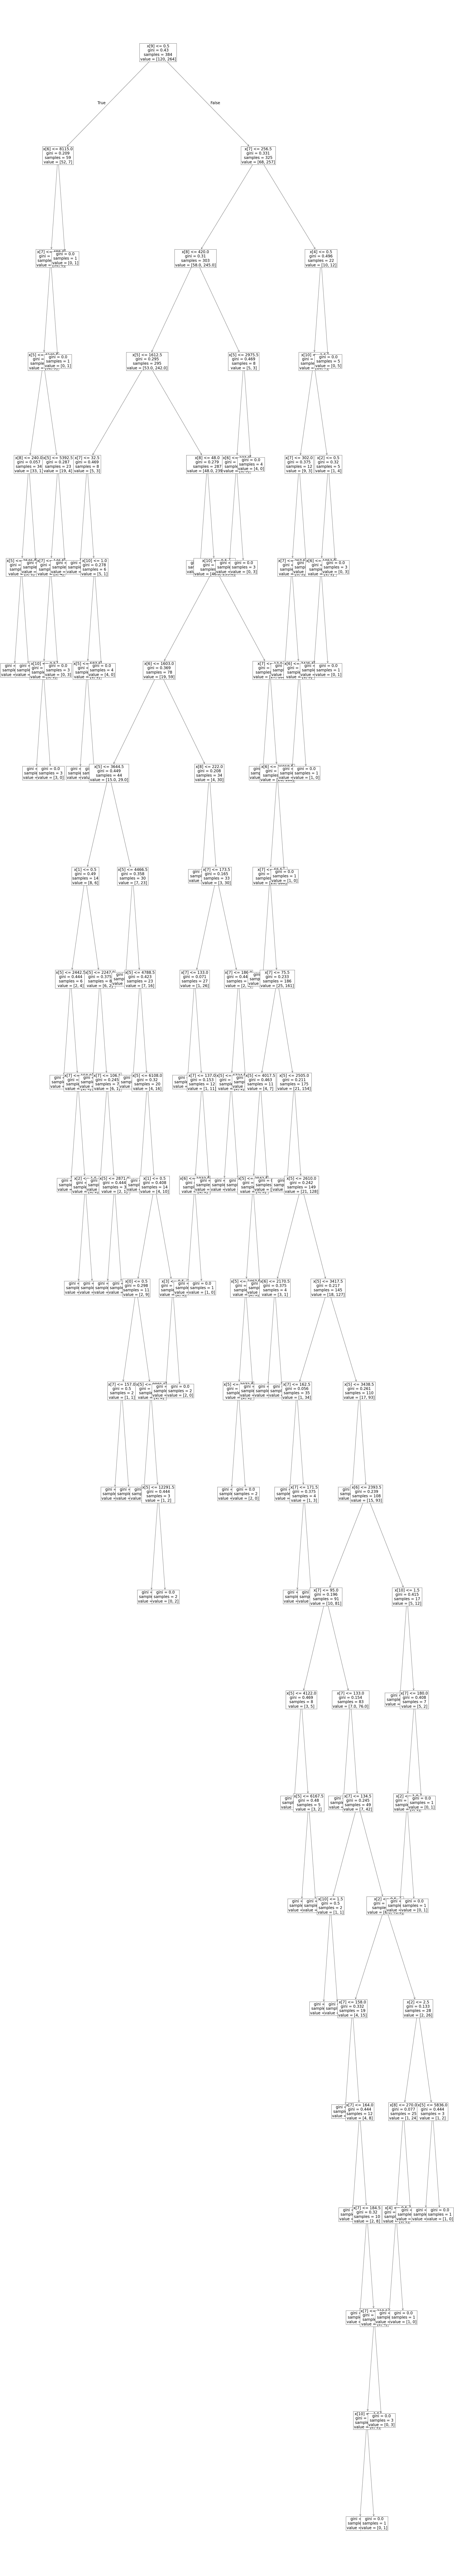

In [123]:
plt.figure(figsize=(50,300))
plot_tree(tree_model_1,impurity = True,fontsize=24 )
plt.show()